In [1]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [2]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible
from new_Adam import Adam_test

In [3]:
Adam_test()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [4]:
import tensorflow
isinstance(Adam_test(), tensorflow.python.keras.optimizers.Optimizer)

True

In [5]:
import keras
isinstance(Adam_test(), keras.optimizers.Optimizer)

False

In [6]:
X_train, X_val, y_train, y_val = mnist_prep()

In [7]:
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

Train on 1000 samples, validate on 500 samples
Epoch 1/10
1000/1000 [==============================] - 0s 46us/sample - loss: 2.0764 - accuracy: 0.3050 - val_loss: 1.7044 - val_accuracy: 0.4840
Epoch 2/10
1000/1000 [==============================] - 0s 24us/sample - loss: 1.3777 - accuracy: 0.5830 - val_loss: 1.1587 - val_accuracy: 0.6520
Epoch 3/10
1000/1000 [==============================] - 0s 24us/sample - loss: 0.8143 - accuracy: 0.7760 - val_loss: 0.7382 - val_accuracy: 0.7800
Epoch 4/10
1000/1000 [==============================] - 0s 26us/sample - loss: 0.4022 - accuracy: 0.8880 - val_loss: 0.5276 - val_accuracy: 0.8240
Epoch 5/10
1000/1000 [==============================] - 0s 24us/sample - loss: 0.2017 - accuracy: 0.9420 - val_loss: 0.4750 - val_accuracy: 0.8600
Epoch 6/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.1092 - accuracy: 0.9730 - val_loss: 0.4576 - val_accuracy: 0.8600
Epoch 7/10
1000/1000 [==============================] - 0s 24us/sample 

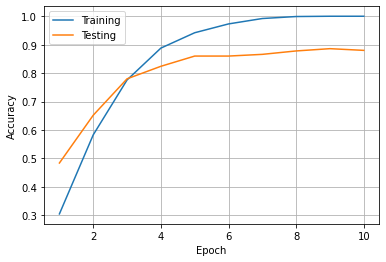

In [8]:
import time
model = nn_model_structure(layers = 5,
                           neurons = [128, 128, 64, 32, 10],
                           n_cols = n_cols)
model = nn_model_compile(model)
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = 100,
                     epochs = 10)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model)
nn_save(model, "../models/model_test_small_new_Adam.h5")